### **Import Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [2]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Pre-Processing

In [3]:
df=pd.read_csv("Company.csv")
df = df.iloc[:, 1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LinkedIn Followers > 1000  800 non-null    int64  
 1   Profile Picture            799 non-null    float64
 2   Responsive Website         799 non-null    float64
 3   Staff Count > 1000         799 non-null    float64
 4   Staff Premium Accounts     795 non-null    float64
 5   Summary Section            798 non-null    float64
 6   Verified Address           797 non-null    float64
 7   Published Articles         796 non-null    float64
 8   Requests Sensitive Info    792 non-null    float64
 9   Legitimate Email           788 non-null    float64
 10  LinkedIn Recommendations   783 non-null    float64
 11  Risk level                 799 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 75.1 KB


In [4]:
# numerical data statistics

round (df.describe(exclude = 'object'), 2)

,LinkedIn Followers > 1000,Profile Picture,Responsive Website,Staff Count > 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations,Risk level
count,800.00,799.00,799.00,799.00,795.00,798.00,797.00,796.00,792.00,788.00,783.00,799.00
mean,0.65,0.83,0.84,0.62,0.52,0.76,0.49,0.51,0.14,0.86,0.51,1.17
std,0.48,0.37,0.37,0.48,0.50,0.43,0.50,0.50,0.34,0.34,0.50,1.69
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,3.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00


In [5]:
df.head(100)

,LinkedIn Followers > 1000,Profile Picture,Responsive Website,Staff Count > 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations,Risk level
0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
4,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
96,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
97,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
98,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0


In [7]:
print(df.isnull().sum().sum())
df.dropna(inplace=True)



55


In [8]:
dupp=df[df.duplicated(keep=False)].shape[0]


In [9]:
df.head(100)

,LinkedIn Followers > 1000,Profile Picture,Responsive Website,Staff Count > 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations,Risk level
0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
4,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
96,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
97,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
98,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0


In [10]:
Ros=df['Risk level']

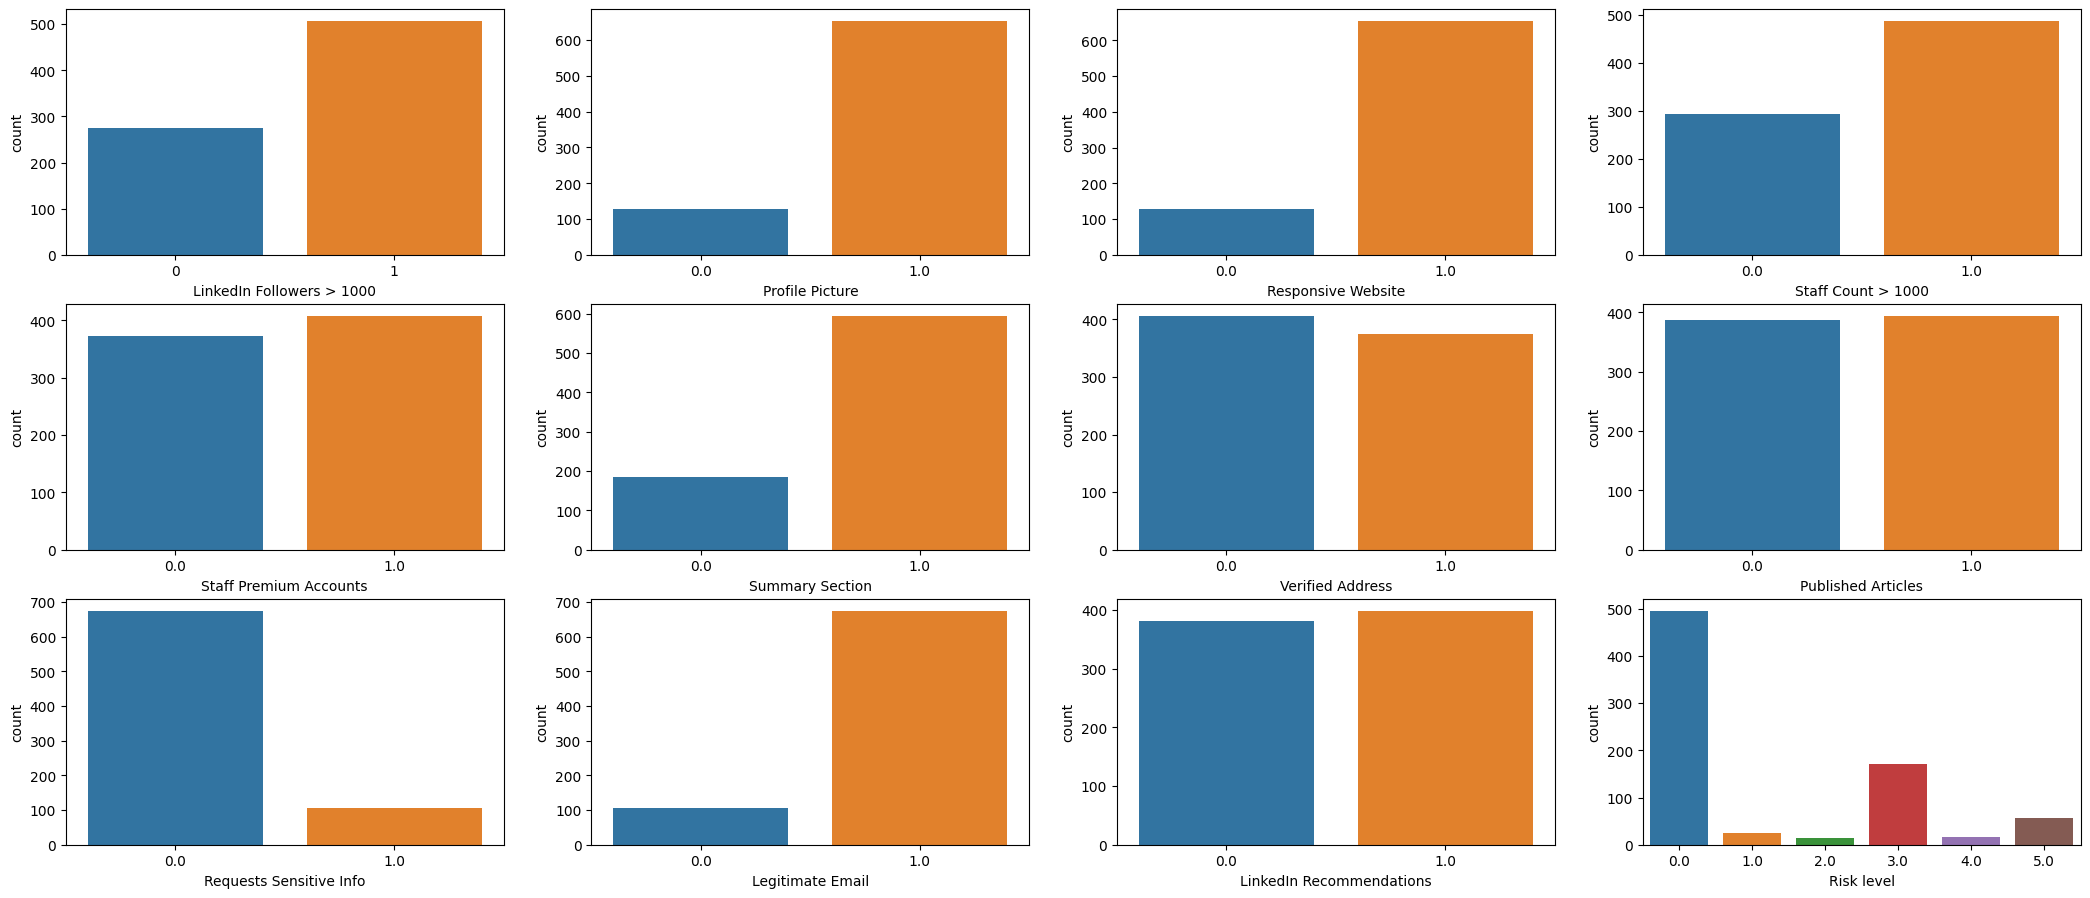

In [11]:
#For all columns doing countplots
fig = plt.figure(figsize=(26,30))
for idx,i in enumerate(df.columns.tolist()):
    ax=plt.subplot(8,4,idx+1)
    sns.countplot(x=i,data=df,ax=ax)
plt.show()

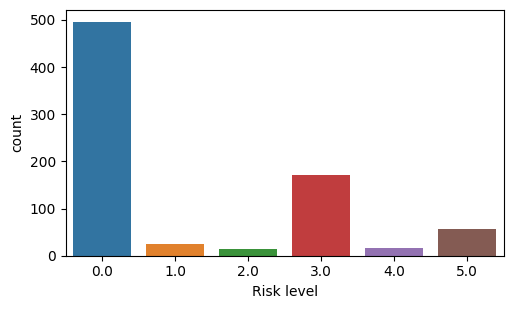

In [12]:
#For all columns doing countplots
fig = plt.figure(figsize=(26,30))
ax=plt.subplot(8,4,6)
sns.countplot(x=i,data=df,ax=ax)

#plt.legend(loc='upper right', labels=['Risk 0', 'Risk 1','Risk2','Risk3','Risk4','Risk5'])
plt.show()

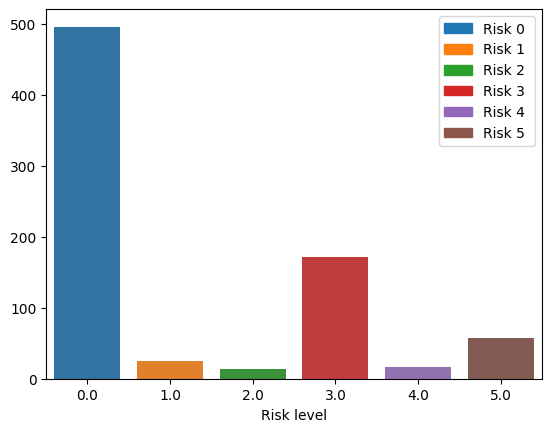

In [13]:
from matplotlib.patches import Patch
import matplotlib.patches as mpatches

Ros = df['Risk level'].value_counts()
s = df['Risk level'].value_counts().rename_axis('Risk level').rename('count') # if x- and y-labels are important
sns.barplot(x=s.index, y=s.values)
legend_labels = [
    mpatches.Patch(color=sns.color_palette()[0], label='Risk 0'),
    mpatches.Patch(color=sns.color_palette()[1], label='Risk 1'),
        mpatches.Patch(color=sns.color_palette()[2], label='Risk 2'),
    mpatches.Patch(color=sns.color_palette()[3], label='Risk 3'),
        mpatches.Patch(color=sns.color_palette()[4], label='Risk 4'),
    mpatches.Patch(color=sns.color_palette()[5], label='Risk 5 ')
]
plt.legend( handles=legend_labels, loc="upper right")
#plt.legend(title="Risk Level frequency",labels = ['type 1', 'type 2','type 3', 'type 4','type 5', 'type 6'])

<Axes: >

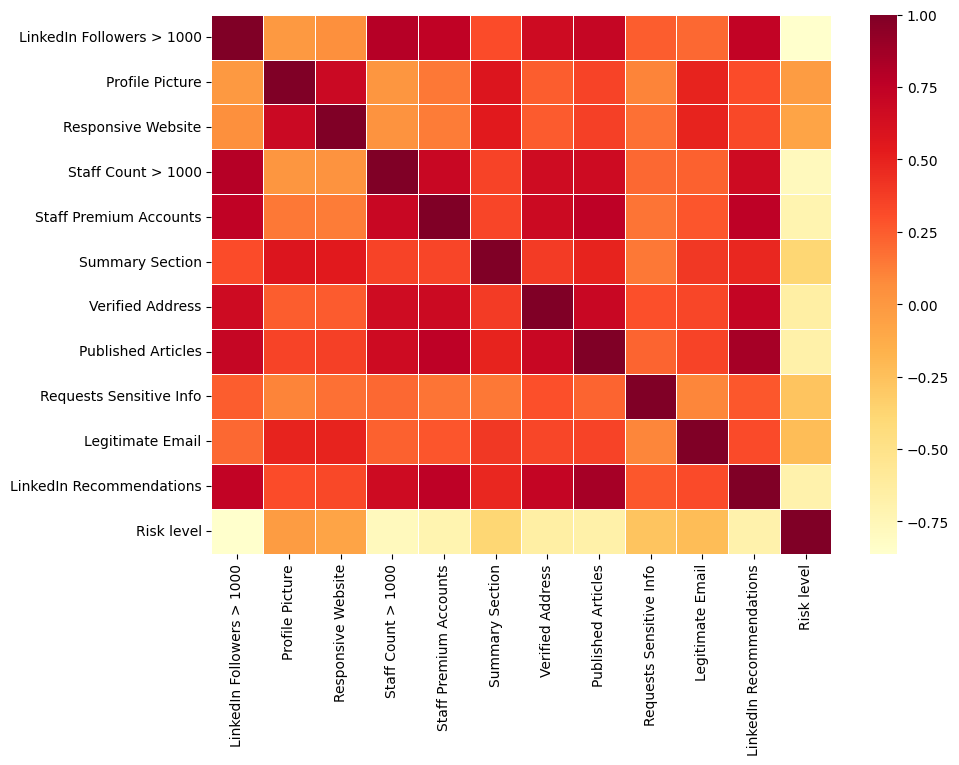

In [14]:
fig, ax = plt.subplots(figsize=(10,7))         # Sample figsize in inches

sns.heatmap(df.corr(),cmap='YlOrRd',linewidths=.5,ax=ax)

In [15]:


X = df.iloc[:,:-1].values
# Now let's tell the dataframe which column we want for the target/labels.  
y = df['Risk level']

In [16]:

X=df.iloc[:,:-1]

In [17]:
df.corr()

,LinkedIn Followers > 1000,Profile Picture,Responsive Website,Staff Count > 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations,Risk level
LinkedIn Followers > 1000,1.000000,-0.006570,0.054126,0.793578,0.747374,0.313334,0.668927,0.709564,0.244319,0.202202,0.735220,-0.861561
Profile Picture,-0.006570,1.000000,0.686001,0.014142,0.144507,0.572614,0.245497,0.349873,0.104754,0.491095,0.314095,-0.020213
Responsive Website,0.054126,0.686001,1.000000,0.031208,0.134388,0.543781,0.256828,0.361358,0.174628,0.494023,0.325424,-0.073946
Staff Count > 1000,0.793578,0.014142,0.031208,1.000000,0.699216,0.349048,0.665292,0.670761,0.206682,0.233445,0.670236,-0.779804
Staff Premium Accounts,0.747374,0.144507,0.134388,0.699216,1.000000,0.344035,0.677769,0.759675,0.161851,0.279734,0.756686,-0.709762
Summary Section,0.313334,0.572614,0.543781,0.349048,0.344035,1.000000,0.386925,0.491999,0.142574,0.401582,0.469189,-0.384346
Verified Address,0.668927,0.245497,0.256828,0.665292,0.677769,0.386925,1.000000,0.701321,0.300090,0.335953,0.719912,-0.647593
Published Articles,0.709564,0.349873,0.361358,0.670761,0.759675,0.491999,0.701321,1.000000,0.220766,0.347506,0.854075,-0.674993
Requests Sensitive Info,0.244319,0.104754,0.174628,0.206682,0.161851,0.142574,0.300090,0.220766,1.000000,0.091544,0.268085,-0.271972
Legitimate Email,0.202202,0.491095,0.494023,0.233445,0.279734,0.401582,0.335953,0.347506,0.091544,1.000000,0.322735,-0.224984


In [18]:
y

0      2.0
1      2.0
2      5.0
3      5.0
4      1.0
      ... 
794    0.0
795    0.0
796    0.0
797    0.0
798    0.0
Name: Risk level, Length: 781, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)


In [20]:
X_train.shape

(546, 11)

In [21]:
SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)


In [22]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [23]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
logi=classifier.predict(X_test)
clf_o = tree.DecisionTreeClassifier()
clf_model = clf_o.fit(X_train, y_train)
clf_prediction=clf_model.predict(X_test)

SVM Method

----------SVM confusion matrix-----
[[144   0   0   3   0   0]
 [  2   2   0   3   0   2]
 [  0   0   0   4   0   0]
 [  0   0   0  51   0   1]
 [  2   0   0   6   0   0]
 [  0   0   0   1   0  14]]
SVM Accuracy: 0.8978723404255319
              precision    recall  f1-score   support

     class 0       0.97      0.98      0.98       147
     class 1       1.00      0.22      0.36         9
     class 2       0.00      0.00      0.00         4
     class 3       0.75      0.98      0.85        52
     class 4       0.00      0.00      0.00         8
     class 5       0.82      0.93      0.87        15

    accuracy                           0.90       235
   macro avg       0.59      0.52      0.51       235
weighted avg       0.87      0.90      0.87       235



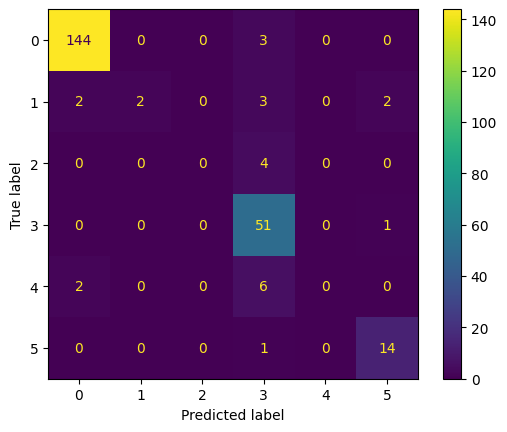

In [26]:
# print(confusion_matrix(y_test, KNN_prediction))
import seaborn as sn
print("----------SVM confusion matrix-----")
cmd=confusion_matrix(y_test, SVC_prediction)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd, display_labels=['0','1','2','3','4','5'])
print("SVM Accuracy:", accuracy_score(y_test, SVC_prediction))
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']
cmd.plot()
print(classification_report(y_test, SVC_prediction, target_names=target_names))


----------SVM confusion matrix-----
[[141   0   0   4   0   2]
 [  2   2   0   3   0   2]
 [  0   0   0   4   0   0]
 [  0   0   0  52   0   0]
 [  0   0   0   6   0   2]
 [  0   0   0   2   0  13]]
SVM Accuracy: 0.8851063829787233
              precision    recall  f1-score   support

     class 0       0.99      0.96      0.97       147
     class 1       1.00      0.22      0.36         9
     class 2       0.00      0.00      0.00         4
     class 3       0.73      1.00      0.85        52
     class 4       0.00      0.00      0.00         8
     class 5       0.68      0.87      0.76        15

    accuracy                           0.89       235
   macro avg       0.57      0.51      0.49       235
weighted avg       0.86      0.89      0.86       235



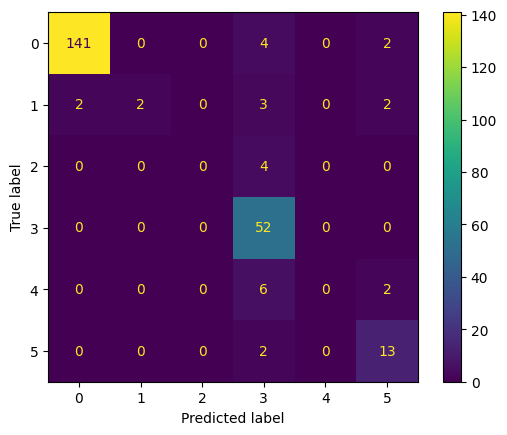

In [54]:
# print(confusion_matrix(y_test, KNN_prediction))
import seaborn as sn
print("----------SVM confusion matrix-----")
cmd=confusion_matrix(y_test, KNN_prediction)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd, display_labels=['0','1','2','3','4','5'])
print("SVM Accuracy:", accuracy_score(y_test, KNN_prediction))
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']
cmd.plot()
print(classification_report(y_test, KNN_prediction, target_names=target_names))


----------SVM confusion matrix-----
[[143   1   0   3   0   0]
 [  2   2   0   3   0   2]
 [  0   0   4   0   0   0]
 [  2   0   1  48   0   1]
 [  1   0   0   7   0   0]
 [  0   0   0   1   0  14]]
SVM Accuracy: 0.8978723404255319
              precision    recall  f1-score   support

     class 0       0.97      0.97      0.97       147
     class 1       0.67      0.22      0.33         9
     class 2       0.80      1.00      0.89         4
     class 3       0.77      0.92      0.84        52
     class 4       0.00      0.00      0.00         8
     class 5       0.82      0.93      0.87        15

    accuracy                           0.90       235
   macro avg       0.67      0.68      0.65       235
weighted avg       0.87      0.90      0.88       235



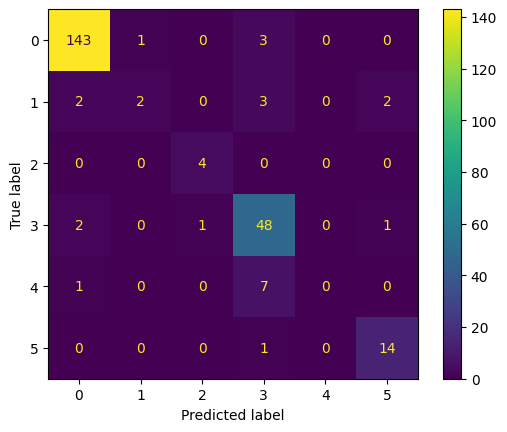

In [61]:
# print(confusion_matrix(y_test, KNN_prediction))
import seaborn as sn
print("----------SVM confusion matrix-----")
cmd=confusion_matrix(y_test, clf_prediction)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd, display_labels=['0','1','2','3','4','5'])
print("SVM Accuracy:", accuracy_score(y_test, clf_predict))
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']
cmd.plot()
print(classification_report(y_test, clf_prediction, target_names=target_names))

In [27]:

y_prob = KNN_model.predict_proba(X_test)
y_prob_logi = KNN_model.predict_proba(X_test)
print(accuracy_score(y_test, KNN_prediction))
print(accuracy_score(y_test, logi))

#print(y_prob_logi)

0.8851063829787233
0.8851063829787233


In [28]:
y_test.shape

(235,)

In [29]:
y_test

677    0.0
718    0.0
245    4.0
10     3.0
556    0.0
      ... 
660    0.0
764    0.0
672    0.0
636    0.0
181    3.0
Name: Risk level, Length: 235, dtype: float64

In [30]:
print("The risk label is :",KNN_prediction[3])

The risk label is : 3.0


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, KNN_prediction))
# print("Precision:", precision_score(y_test, KNN_prediction))
# print("Recall:", recall_score(y_test, KNN_prediction))
# print("F1 score:", f1_score(y_test, KNN_prediction))

Accuracy: 0.8851063829787233


In [32]:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X_train, y_train)
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, predictive_labels))
# print("Precision:", precision_score(y_test, predictive_labels))
# print("Recall:", recall_score(y_test, predictive_labels))
# print("F1 score:", f1_score(y_test, predictive_labels))
# print(predictive_labels)

In [33]:
from sklearn import tree

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [35]:
clf_predict=clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, clf_predict))
#print("Precision:", precision_score(y_test, clf_predict))
# print("Recall:", recall_score(y_test, clf_predict))
# print("F1 score:", f1_score(y_test, clf_predict))
# print(predictive_labels)

Accuracy: 0.8978723404255319


In [36]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

In [37]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import imblearn
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import RandomOverSampler
oversample_ = SMOTE()

#oversample = RandomOverSampler(sampling_strategy='minority')

In [39]:
X_over, y_over = oversample_.fit_resample(X, y)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.3, random_state=27)


In [40]:
X_test_o.shape

(893, 11)

In [41]:
SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
Tree_model=tree.DecisionTreeClassifier()


In [42]:
SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model_over = KNeighborsClassifier(n_neighbors=5)


In [43]:
KNN_model_over.fit(X_train_o, y_train_o)
SVC_model.fit(X_train_o, y_train_o)
SVC_prediction = SVC_model.predict(X_test_o)
Tree_model.fit(X_train_o, y_train_o)
tree_prediction = Tree_model.predict(X_test_o)

KNN_predictions = KNN_model_over.predict(X_test_o)
print(accuracy_score(y_test_o, KNN_predictions))
print(accuracy_score(y_test_o, SVC_prediction))
print(accuracy_score(y_test_o, tree_prediction))

0.8857782754759238
0.8544232922732363
0.9092945128779395


In [44]:
svc_over=SVC_model.predict(X_test)
print(accuracy_score(y_test, svc_over))

0.8808510638297873


----------KNN confusion matrix-----
KNN Accuracy: 0.8857782754759238
              precision    recall  f1-score   support

     class 0       1.00      0.93      0.96       166
     class 1       0.90      0.87      0.89       146
     class 2       0.96      0.99      0.98       140
     class 3       0.78      0.88      0.82       152
     class 4       0.76      0.77      0.77       142
     class 5       0.93      0.87      0.90       147

    accuracy                           0.89       893
   macro avg       0.89      0.89      0.89       893
weighted avg       0.89      0.89      0.89       893



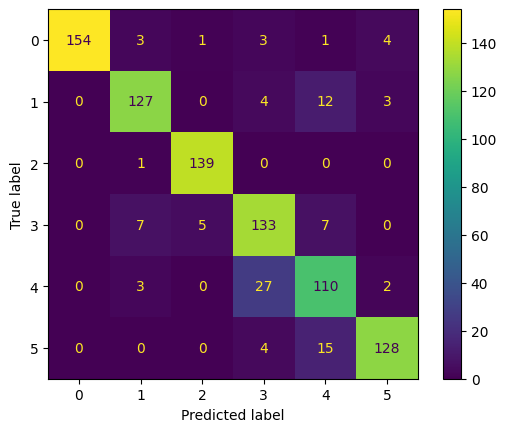

In [45]:
# print(confusion_matrix(y_test, KNN_prediction))
import seaborn as sn
print("----------KNN confusion matrix-----")
cmd_=confusion_matrix(y_test_o, KNN_predictions)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd_, display_labels=['0','1','2','3','4','5'])
print("KNN Accuracy:", accuracy_score(y_test_o, KNN_predictions))
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']
cmd.plot()
print(classification_report(y_test_o, KNN_predictions, target_names=target_names))


----------KNN confusion matrix-----
SVM Accuracy: 0.8544232922732363
              precision    recall  f1-score   support

     class 0       1.00      0.96      0.98       166
     class 1       0.88      0.73      0.80       146
     class 2       0.95      0.96      0.95       140
     class 3       0.83      0.70      0.76       152
     class 4       0.66      0.89      0.76       142
     class 5       0.85      0.88      0.87       147

    accuracy                           0.85       893
   macro avg       0.86      0.85      0.85       893
weighted avg       0.87      0.85      0.86       893



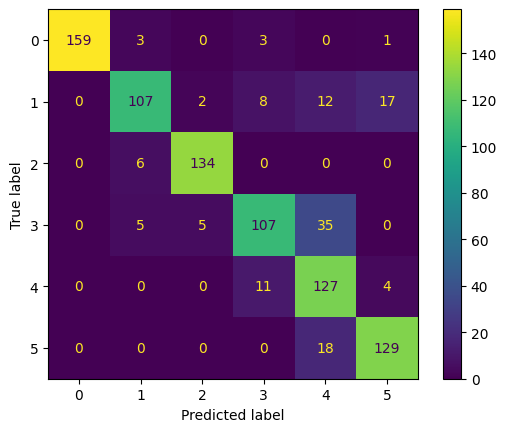

In [46]:
# print(confusion_matrix(y_test, KNN_prediction))
import seaborn as sn
print("----------KNN confusion matrix-----")
cmd_=confusion_matrix(y_test_o, SVC_prediction)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd_, display_labels=['0','1','2','3','4','5'])
print("SVM Accuracy:", accuracy_score(y_test_o, SVC_prediction))
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']
cmd.plot()
print(classification_report(y_test_o, SVC_prediction, target_names=target_names))

----------KNN confusion matrix-----
KNN Accuracy: 0.9092945128779395
              precision    recall  f1-score   support

     class 0       1.00      0.93      0.96       166
     class 1       0.89      0.92      0.91       146
     class 2       0.97      0.99      0.98       140
     class 3       0.79      0.88      0.83       152
     class 4       0.91      0.75      0.82       142
     class 5       0.92      0.98      0.95       147

    accuracy                           0.91       893
   macro avg       0.91      0.91      0.91       893
weighted avg       0.91      0.91      0.91       893



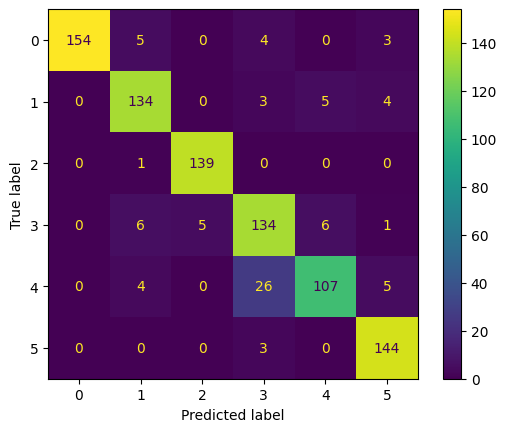

In [47]:
# print(confusion_matrix(y_test, KNN_prediction))
import seaborn as sn
print("----------KNN confusion matrix-----")
cmd_=confusion_matrix(y_test_o, tree_prediction)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd_, display_labels=['0','1','2','3','4','5'])
print("KNN Accuracy:", accuracy_score(y_test_o, tree_prediction))
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']
cmd.plot()
print(classification_report(y_test_o, tree_prediction, target_names=target_names))


K-Fold Cross Validation

In [62]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(KNN_model, X_over, y_over, cv=kfold)
scores_svm = cross_val_score(SVC_model, X_over, y_over, cv=kfold)
scores_clf = cross_val_score(Tree_model, X_over, y_over, cv=kfold)
# Print the cross-validation scores
print('KNN-Cross-validation scores: {}'.format(scores))
print('SVM scores: {}'.format(scores_svm))
print('Decision Tree: {}'.format(scores_clf))


KNN-Cross-validation scores: [0.75503356 0.8789916  0.70420168 0.84537815 0.89747899]
SVM scores: [0.86409396 0.88235294 0.86386555 0.85546218 0.80840336]
Decision Tree: [0.91107383 0.90420168 0.89411765 0.89411765 0.91092437]


In [50]:
DT_CROSS_VAL = cross_val_score(KNN_model,X_over,y_over,cv=10,scoring='f1')
RF_CROSS_VAL = cross_val_score(SVC_model,X_over,y_over,cv=10,scoring='f1')
SVM_CROSS_VAL = cross_val_score(Tree_model,X_over,y_over,cv=10,scoring='f1')


In [51]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

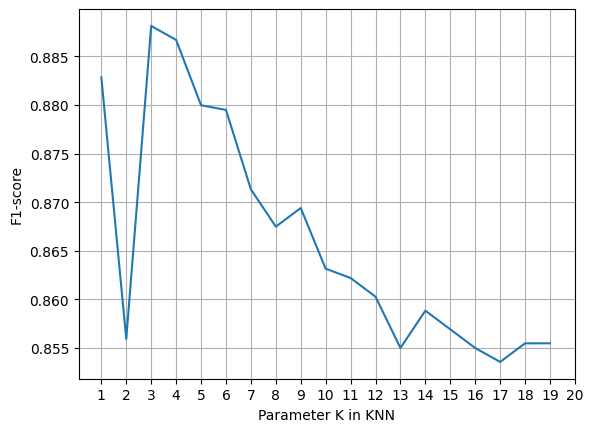

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train_o,y_train_o,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel("Parameter K in KNN")
plt.ylabel("F1-score")
plt.grid()